[Back to Assignment 5](_Oving5.ipynb)
# Solving ODEs and plotting

In this asignment you will be using a numerical method to solve ODEs of the form 
$$\dot{y} = f(y)$$ 
You will also learn how to do some basic plotting with $\texttt{matplotlib.pyplot}$ 

## 1 Forward Euler method
The forward Euler method is 
$$y_{n+1} = y_n + \Delta t f(y_n),$$

where $y_n$ is the numerical approximation to exact solution $y(t_n)$ at time $t_n = n \Delta t$, and $\Delta t<<1$ is a small time step. 


First, let's consider the ODE
$$\dot{y} = - \lambda y$$
where $\lambda$ is a positive constant. The following code can be used to solve the above ODE using the forward Euler method. At each time-step, the code prints what time we are at $t_n$ and the value of the solution at that time $y_n$. 

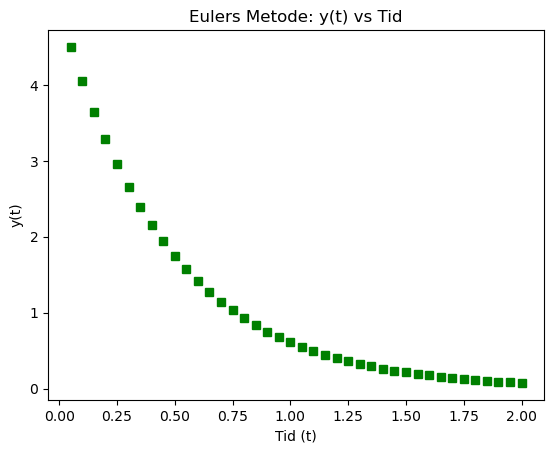

In [14]:
# This is where you write the code for task 1a) and 1b)
import matplotlib.pyplot as plt

lam = -2          # lambda
dt  = 0.05        # time step
T   = 2  # total integration time 
nt  = round(T/dt) # total number of time steps
y   = 5          # initial conditions 

# (1a) Write a function here

def f(yn,lam,dt):
    return dt*lam*yn

for it in range(0,nt):
    #y = y - dt*lam*y # (1a) Your function should go here! 
    y = y + f(y,lam,dt)
    time = (it + 1) * dt
    #print("t_n = %-.2f, y_n = %-.3f" % ((it+1)*dt,y)) # (1b) your plotting command should replace this line
    
    plt.title('Eulers Metode: y(t) vs Tid')
    plt.xlabel('Tid (t)')
    plt.ylabel('y(t)')
    plt.plot(time,y,'gs')
    


## a) 
The above code is specifically written for the ODE $\dot{y} = f(y)$, where $f(y) = -\lambda y$. Your first task is to re-write the above code using a function for $f(y)$. That is, write a function that takes the value $y_n$ and returns $-\lambda y_n$ and incorporate it into the above code. (There are hints in the code!)

## b)

The above code prints the values for $t_n$ and $y_n$ at each time step. While printing is an acceptable way to see what your code is doing, an even better way is to visualise the solution using a plot. The following code plots the points $(t,t^2)$ for $t = 1,2,3,4,5$. Replace the print statement in the above code with some code that plots the points $(t_n,y_n)$. 

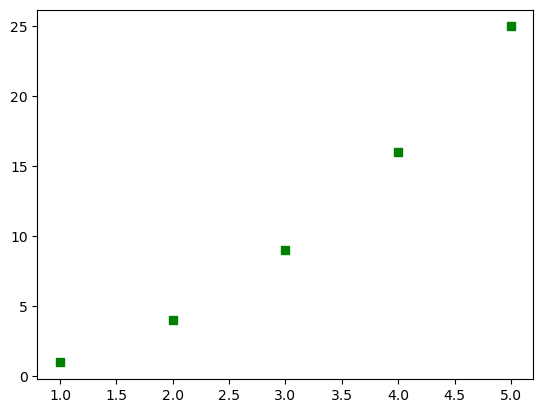

In [2]:
import matplotlib.pyplot as plt
for i in [1,2,3,4,5]:
    plt.plot(i,i**2,'gs') #  Note that the 'gs' here specifies is the marker type, i.e., a green square. You can try other marker types such as 'rx', 'bs' etc. 

## c)  
Use the forward Euler method to solve the following ODE and plot the solution. $$\dot{y} = (y-3)(y+1)$$ Plot the solution over the time interval $t\in[0,2]$ using the initial conditions $y_0 = 2$ and with a time step of $\Delta t = 0.05$. What value does the solution converge to? 

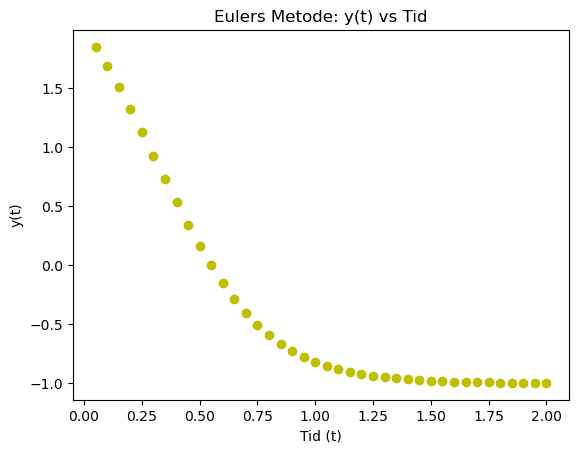

In [51]:
import matplotlib.pyplot as plt

dt  = 0.05        # time step
T   = 2  # total integration time 
nt  = round(T/dt) # total number of time steps
y   = 2         # initial conditions 

def f(yn,dt):
    return dt*(yn - 3)*(yn + 1)

for it in range(0,nt):
    y = y + f(y,dt)
    time = (it + 1) * dt
    #print("t_n = %-.2f, y_n = %-.3f" % ((it+1)*dt,y)) # (1b) your plotting command should replace this line
    
    plt.title('Eulers Metode: y(t) vs Tid')
    plt.xlabel('Tid (t)')
    plt.ylabel('y(t)')
    plt.plot(time,y,'yo-')
    

# 2 Backward Euler method
In this exercise we will use the backward Euler method to solve ODEs. Recall that the backward Euler method is 
$$y_{n+1} = y_n + \Delta t f(y_{n+1})$$
and hence $y_{n+1}$ can be found by solving for the root of the non-linear implicit algebraic equation $$g(y_{n+1}) := y_n + \Delta t f(y_{n+1}) - y_{n+1} = 0$$
You can solve for $y_{n+1}$ using Newton's method, which is what we will do. 
Additionally, the derivative of $g(y_{n+1})$ is given by 
$$g'(y_{n+1}) = \frac{\mathrm{d} g(y_{n+1})}{\mathrm{d} y_{n+1}} = \Delta t \frac{\mathrm{d} f(y_{n+1})}{\mathrm{d} y_{n+1}} -1$$


The following code uses the backward Euler method to solve the ODE$$\dot{y} = - \lambda y.$$ In the following questions, you will modify this code to solve the ODE $$\dot{y} = (y-3)(y+1).$$

In [35]:
lam = 2           # lambda
dt  = 0.05        # time step
T   = 0.2         # total integration time 
nt  = round(T/dt) # total number of time steps
y   = 1           # initial conditions 

# (2a) write functions for f, g, df, and dg here 

#Funskjonen f(y)
def f(y): 
    return (y - 3)*(y + 1)

#f(y) derivert
def df(y):
    return 2*y - 2

def g(y_n, y_next, dt):
    return y_n + dt*f(y_next) - y_next

def dg(dt, y_next):
    return dt*df(y_next) - 1
    
for it in range(0,nt):
    y = y/(1+dt*lam) # (2b) this line should be replaced by Newton's method for $g(x) = 0$
    print("t_n = %-.2f, y_n = %-.3f" % ((it+1)*dt,y)) # you should replace this line with a plot

t_n = 0.05, y_n = 0.909
t_n = 0.10, y_n = 0.826
t_n = 0.15, y_n = 0.751
t_n = 0.20, y_n = 0.683


# a) 
Write functions for $f(y)$, $f'(y)$, $g(y_{n+1})$, $g'(y_{n+1})$. Note that $g'(y_{n+1})$ also needs the derivative of $f(y_{n+1})$, which is $f'(y_{n+1}) = (y_{n+1}-3)+(y_{n+1}+1)$.

## b)
Using the backward Euler method with Newton iterations, plot the solution for the initial conditions $y_0 = 2$ and with a time step of $\Delta t = 0.05$.  

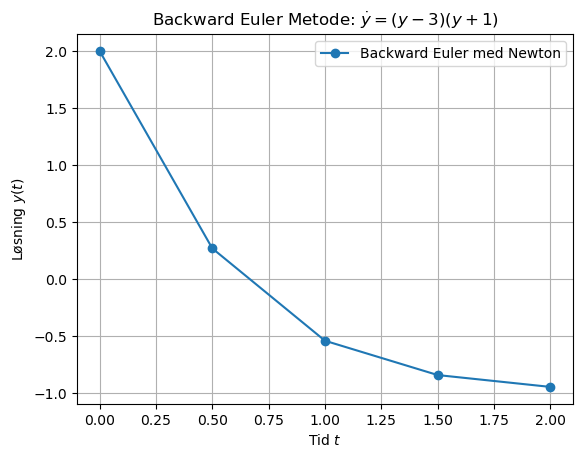

In [50]:
import numpy as np
import matplotlib.pyplot as plt

#######################################################################
########################## FUNKSJONER #################################
#######################################################################

# Funksjonen f(y)
def f(y): 
    return (y - 3)*(y + 1)

# f'(y) derivert
def df(y):
    return 2*y - 2

# g(y_next) = y_n + dt * f(y_next) - y_next
def g(y_n, y_next, dt):
    return y_n + dt*f(y_next) - y_next

# g'(y_next) = dt * f'(y_next) - 1
def dg(dt, y_next):
    return dt*df(y_next) - 1

# Newtons metode implementasjon
def newton(y_n, g_func, dg_func, tol=1e-10, max_iter=100):
    y_next = y_n                                              # Initialbetingelse 
    k = 0 
    kmax = max_iter                                           # Maks antall interasjoner
    
    while abs(g_func(y_next)) > tol and k < kmax:
        if abs(dg_func(y_next)) > 1e-14:                      # hvis dg(y) ikke er null
            y_next = y_next - g_func(y_next)/dg_func(y_next)  # Newton iterasjon
            k += 1
        elif abs(dg_func(y_next)) < 1e-14:                    # hvis dg(y) er nesten null
            k = kmax                                          # exit loop
        
    if k == kmax and abs(g_func(y_next)) > tol: 
        print('Warning! Newton iterations did not converge :(')
        return np.nan
    else:
        return y_next

#######################################################################
##########################  Løsning ###################################
#######################################################################

# Parametre
dt = 0.5         # Tidssteg
T = 2.0           # Total tid
nt = int(T / dt)  # Antall tidssteg
y0 = 2            # Startbetingelse

# Lister for å lagre resultatene
y_values = [y0]
t_values = [0]

# Startbetingelse
y = y0

# Tidsintegrasjon ved bruk av Backward Euler med Newtons metode
for it in range(nt):
    t = (it + 1) * dt
    
    # Definerer g(y_next) og dg(y_next) funksjoner dynamisk med nåværende y_n
    g_func = lambda y_next: g(y, y_next, dt)
    dg_func = lambda y_next: dg(dt, y_next)
    
    # Oppdaterer y ved bruk av Newtons metode
    #y = newton(y, g_func, dg_func)
    y = newton(y+dt*f(y), g_func, dg_func)
    
    # Lagrer resultatene
    y_values.append(y)
    t_values.append(t)

# Plotter løsningen
plt.plot(t_values, y_values, label="Backward Euler med Newton", marker='o')
plt.title("Backward Euler Metode: $\dot{y} = (y-3)(y+1)$")
plt.xlabel('Tid $t$')
plt.ylabel('Løsning $y(t)$')
plt.grid(True)
plt.legend()
plt.show()

Hint: The following code uses Newton iterations to find a root of a function $g(y)$.

In [34]:
import numpy

def newton(y,g,dg):
    # use Newton iterations to solve the scalar function g(y) = 0
    # INPUT: 
    # y  - initial guess (float)
    # g  - function we are solving (function)
    # dg - derivative of the function g (function)
    # OUTPUT:
    # y - the solution to g(y) = 0 to within tol
    # if the Newton iterations do not converge then it will print an error message and return nan (not a number)
    
    k = 0 
    kmax = 100    # max iterations
    tol = 1e-10   # tolerance
    
    while abs(g(y))>tol and k<kmax:
        if abs(dg(y))>1e-14:       # if dg(y) is not zero 
            y = y - g(y)/dg(y)     # Newton iteration 
            k = k + 1
        elif abs(dg(y))<1e-14:     # if dg(y) is nearly zero
            k = kmax               # exit loop
        
    if k == kmax and abs(g(y))>tol: 
        print('Warning! Newton iterations did not converge :(')
        return numpy.nan
    else:
        return y


In [31]:
# Example of use:
def g(y): # some function that we want to find the root of
    return (y-2)*(y+5)
def dg(y): # the derivative of g(y)
    return (y-2)+(y+5)

y1 = 4 # intial guesses
y2 = -3
y3 = -3/2 # Note: dg(y3) = 0 so Newton iterations won't converge for this initial guess

root1 = newton(y1,g,dg)
print("root1 = %.2f" % root1)

root2 = newton(y2,g,dg)
print("root2 = %.2f" % root2)

root3 = newton(y3,g,dg)
print("root3 = %.2f\n\nnote that we converged to different roots based on the initial guess!" % root3)  

root1 = 2.00
root2 = -5.00
Warning! Newton iterations did not converge :(
root3 = nan

note that we converged to different roots based on the initial guess!


## c)
We have been using $y_n$ as your initial guess for the Newton iterations, however you may notice that for some (larger) times-steps that the Newton iterations don't converge (e.g., try your code for $\Delta t = 0.5$). In this case you could use a forward Euler step as an initial guess, that is instead of  $\texttt{ newton(y, g, dg)}$, you can use  $ \texttt{ newton(y+dt*f(y), g, dg)}$. Why is this a better initial guess for the Newton iteration? 

## Solution:

To use a forward Euler step as an initial guess, is a better approach because it provides a more accurate estimate of the next value y_n+1. Especially for lagrer time steps.


The forward Euler method gives an approximation of the next value y_n+1 based on the current value y_n and the derivative f(y_n, t_n). This approximation is closer to the true solution compared to the initial guess, especially for larger time steps. Newtons method works best when the initial guess is near the actual root.


The forward Euler method is typically accurate for small time steps Δ𝑡. Even though it's not as stable as backward Euler for larger Δ𝑡, using it as an initial guess helps because the forward Euler estimate is more informed by the differential equation's slope at y_n. This gives Newton's method a head start by starting from a more reasonable position, particularly when Δt is large.


## d) 
We now have two programs that solve the ODE $$\dot{y} = (y-3)(y+1),$$
one that uses the forward Euler method and one using the Backward Euler method. You may have noticed that the backward Euler method is harder to implement and may be wondering what is the point of using an implicit method if you have to solve a non-linear equation at each iteration.

Your last task is to run both programmes with larger and larger time steps and tell us your observations. Out of the forward and backward Euler methods, which one is better at larger $\Delta t$ ? (For example, $\Delta t > 0.5$ is large enough)

Hint: you may have to use a forward Euler step as the intitial guess for the Newton iterations as explained in the previous question. 

## Solution:

My observations are that the Forward Euler method provides an accurate solution for small delta t-values. For larger delta t-values the forward Euler method becomes very unstable. The values of y(t) can even oscillate. 

For larger time steps the backward Eulers Method with the forward Euler step as the initial guess is cleary better. 



See plot examples below:

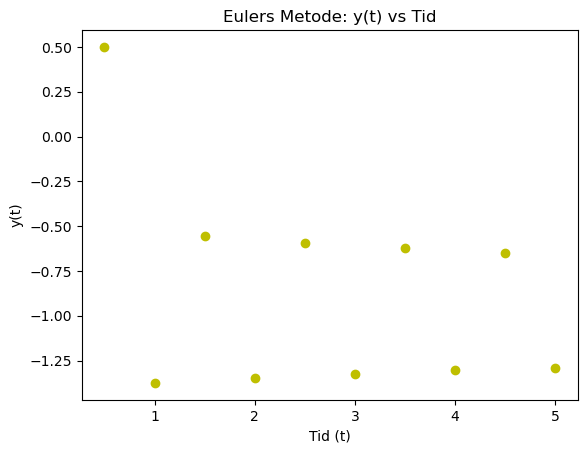

In [52]:
import matplotlib.pyplot as plt

dt  = 0.5        # time step
T   = 5  # total integration time 
nt  = round(T/dt) # total number of time steps
y   = 2         # initial conditions 

def f(yn,dt):
    return dt*(yn - 3)*(yn + 1)

for it in range(0,nt):
    y = y + f(y,dt)
    time = (it + 1) * dt
    #print("t_n = %-.2f, y_n = %-.3f" % ((it+1)*dt,y)) # (1b) your plotting command should replace this line
    
    plt.title('Eulers Metode: y(t) vs Tid')
    plt.xlabel('Tid (t)')
    plt.ylabel('y(t)')
    plt.plot(time,y,'yo-')
    

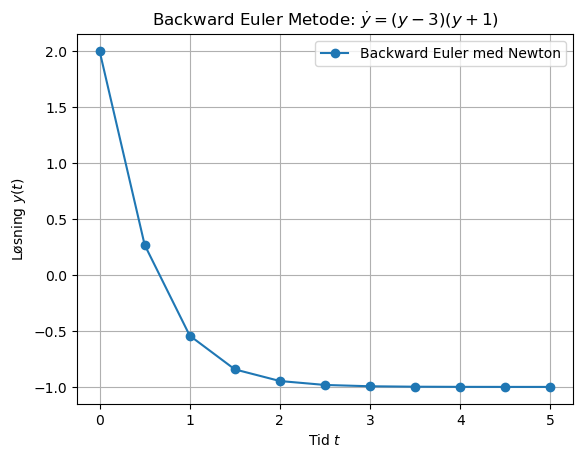

In [53]:
import numpy as np
import matplotlib.pyplot as plt

#######################################################################
########################## FUNKSJONER #################################
#######################################################################

# Funksjonen f(y)
def f(y): 
    return (y - 3)*(y + 1)

# f'(y) derivert
def df(y):
    return 2*y - 2

# g(y_next) = y_n + dt * f(y_next) - y_next
def g(y_n, y_next, dt):
    return y_n + dt*f(y_next) - y_next

# g'(y_next) = dt * f'(y_next) - 1
def dg(dt, y_next):
    return dt*df(y_next) - 1

# Newtons metode implementasjon
def newton(y_n, g_func, dg_func, tol=1e-10, max_iter=100):
    y_next = y_n                                              # Initialbetingelse 
    k = 0 
    kmax = max_iter                                           # Maks antall interasjoner
    
    while abs(g_func(y_next)) > tol and k < kmax:
        if abs(dg_func(y_next)) > 1e-14:                      # hvis dg(y) ikke er null
            y_next = y_next - g_func(y_next)/dg_func(y_next)  # Newton iterasjon
            k += 1
        elif abs(dg_func(y_next)) < 1e-14:                    # hvis dg(y) er nesten null
            k = kmax                                          # exit loop
        
    if k == kmax and abs(g_func(y_next)) > tol: 
        print('Warning! Newton iterations did not converge :(')
        return np.nan
    else:
        return y_next

#######################################################################
##########################  Løsning ###################################
#######################################################################

# Parametre
dt = 0.5         # Tidssteg
T = 5.0           # Total tid
nt = int(T / dt)  # Antall tidssteg
y0 = 2            # Startbetingelse

# Lister for å lagre resultatene
y_values = [y0]
t_values = [0]

# Startbetingelse
y = y0

# Tidsintegrasjon ved bruk av Backward Euler med Newtons metode
for it in range(nt):
    t = (it + 1) * dt
    
    # Definerer g(y_next) og dg(y_next) funksjoner dynamisk med nåværende y_n
    g_func = lambda y_next: g(y, y_next, dt)
    dg_func = lambda y_next: dg(dt, y_next)
    
    # Oppdaterer y ved bruk av Newtons metode
    #y = newton(y, g_func, dg_func)
    y = newton(y+dt*f(y), g_func, dg_func)
    
    # Lagrer resultatene
    y_values.append(y)
    t_values.append(t)

# Plotter løsningen
plt.plot(t_values, y_values, label="Backward Euler med Newton", marker='o')
plt.title("Backward Euler Metode: $\dot{y} = (y-3)(y+1)$")
plt.xlabel('Tid $t$')
plt.ylabel('Løsning $y(t)$')
plt.grid(True)
plt.legend()
plt.show()